In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as  mpl
import matplotlib.pyplot as plt

In [2]:
longdf = pd.read_csv("fred_data.csv")

In [3]:
thecols = ['date', 'val', 'series_id']
widedf = longdf[thecols].pivot(index="date", 
                                columns="series_id", 
                                values="val")


In [4]:
widedf.index = pd.to_datetime(widedf.index)
widedf.sort_index(inplace=True)
widedf = widedf.loc[widedf['PAYEMS'].notnull()]
widedf.ffill(axis=0, inplace=True)
widedf['target'] = widedf['PAYEMS'].shift(-1)
widedf = widedf.loc[widedf.index <= '2019-01-01']
widedf = widedf.loc[widedf.index >= '2011-01-01']
widedf.tail()


series_id,ADPWNUSNERSA,CCSA,CIVPART,CLF16OV,ICSA,JTS1000HIL,JTS1000JOL,JTS1000TSL,LNS12032194,PAYEMS,U6Rate,UEMP27OV,UNEMPLOY,UNRATE,USPRIV,target
date,,,,,,,,,,,,,,,,
2018-09-01,125291000.0,1575000.0,62.8,162087.0,201000.0,5287.0,6794.0,5147.0,4625.0,149358.0,7.5,1351.0,6073.0,3.7,126884.0,149526.0
2018-10-01,125291000.0,1575000.0,62.9,162602.0,201000.0,5562.0,6688.0,5246.0,4553.0,149526.0,7.5,1348.0,6211.0,3.8,127047.0,149617.0
2018-11-01,125291000.0,1575000.0,62.9,162836.0,201000.0,5461.0,6919.0,5422.0,4665.0,149617.0,7.6,1228.0,6115.0,3.8,127144.0,149809.0
2018-12-01,125784000.0,1694000.0,63.0,163206.0,232000.0,5400.0,6809.0,5220.0,4627.0,149809.0,7.6,1306.0,6389.0,3.9,127298.0,150059.0
2019-01-01,125784000.0,1694000.0,63.1,162963.0,232000.0,5411.0,6808.0,5150.0,5190.0,150059.0,8.0,1287.0,6475.0,4.0,127551.0,150065.0


In [5]:
diffdf = widedf.diff()
diffdf.tail()

series_id,ADPWNUSNERSA,CCSA,CIVPART,CLF16OV,ICSA,JTS1000HIL,JTS1000JOL,JTS1000TSL,LNS12032194,PAYEMS,U6Rate,UEMP27OV,UNEMPLOY,UNRATE,USPRIV,target
date,,,,,,,,,,,,,,,,
2018-09-01,2559000.0,-336000.0,0.2,427.0,-55000.0,-139.0,311.0,-67.0,225.0,79.0,0.1,64.0,-83.0,-0.1,73.0,168.0
2018-10-01,0.0,0.0,0.1,515.0,0.0,275.0,-106.0,99.0,-72.0,168.0,0.0,-3.0,138.0,0.1,163.0,91.0
2018-11-01,0.0,0.0,0.0,234.0,0.0,-101.0,231.0,176.0,112.0,91.0,0.1,-120.0,-96.0,0.0,97.0,192.0
2018-12-01,493000.0,119000.0,0.1,370.0,31000.0,-61.0,-110.0,-202.0,-38.0,192.0,0.0,78.0,274.0,0.1,154.0,250.0
2019-01-01,0.0,0.0,0.1,-243.0,0.0,11.0,-1.0,-70.0,563.0,250.0,0.4,-19.0,86.0,0.1,253.0,6.0


In [6]:
plot_cols = 4
plot_rows = int(np.ceil(len(widedf.columns) / plot_cols))

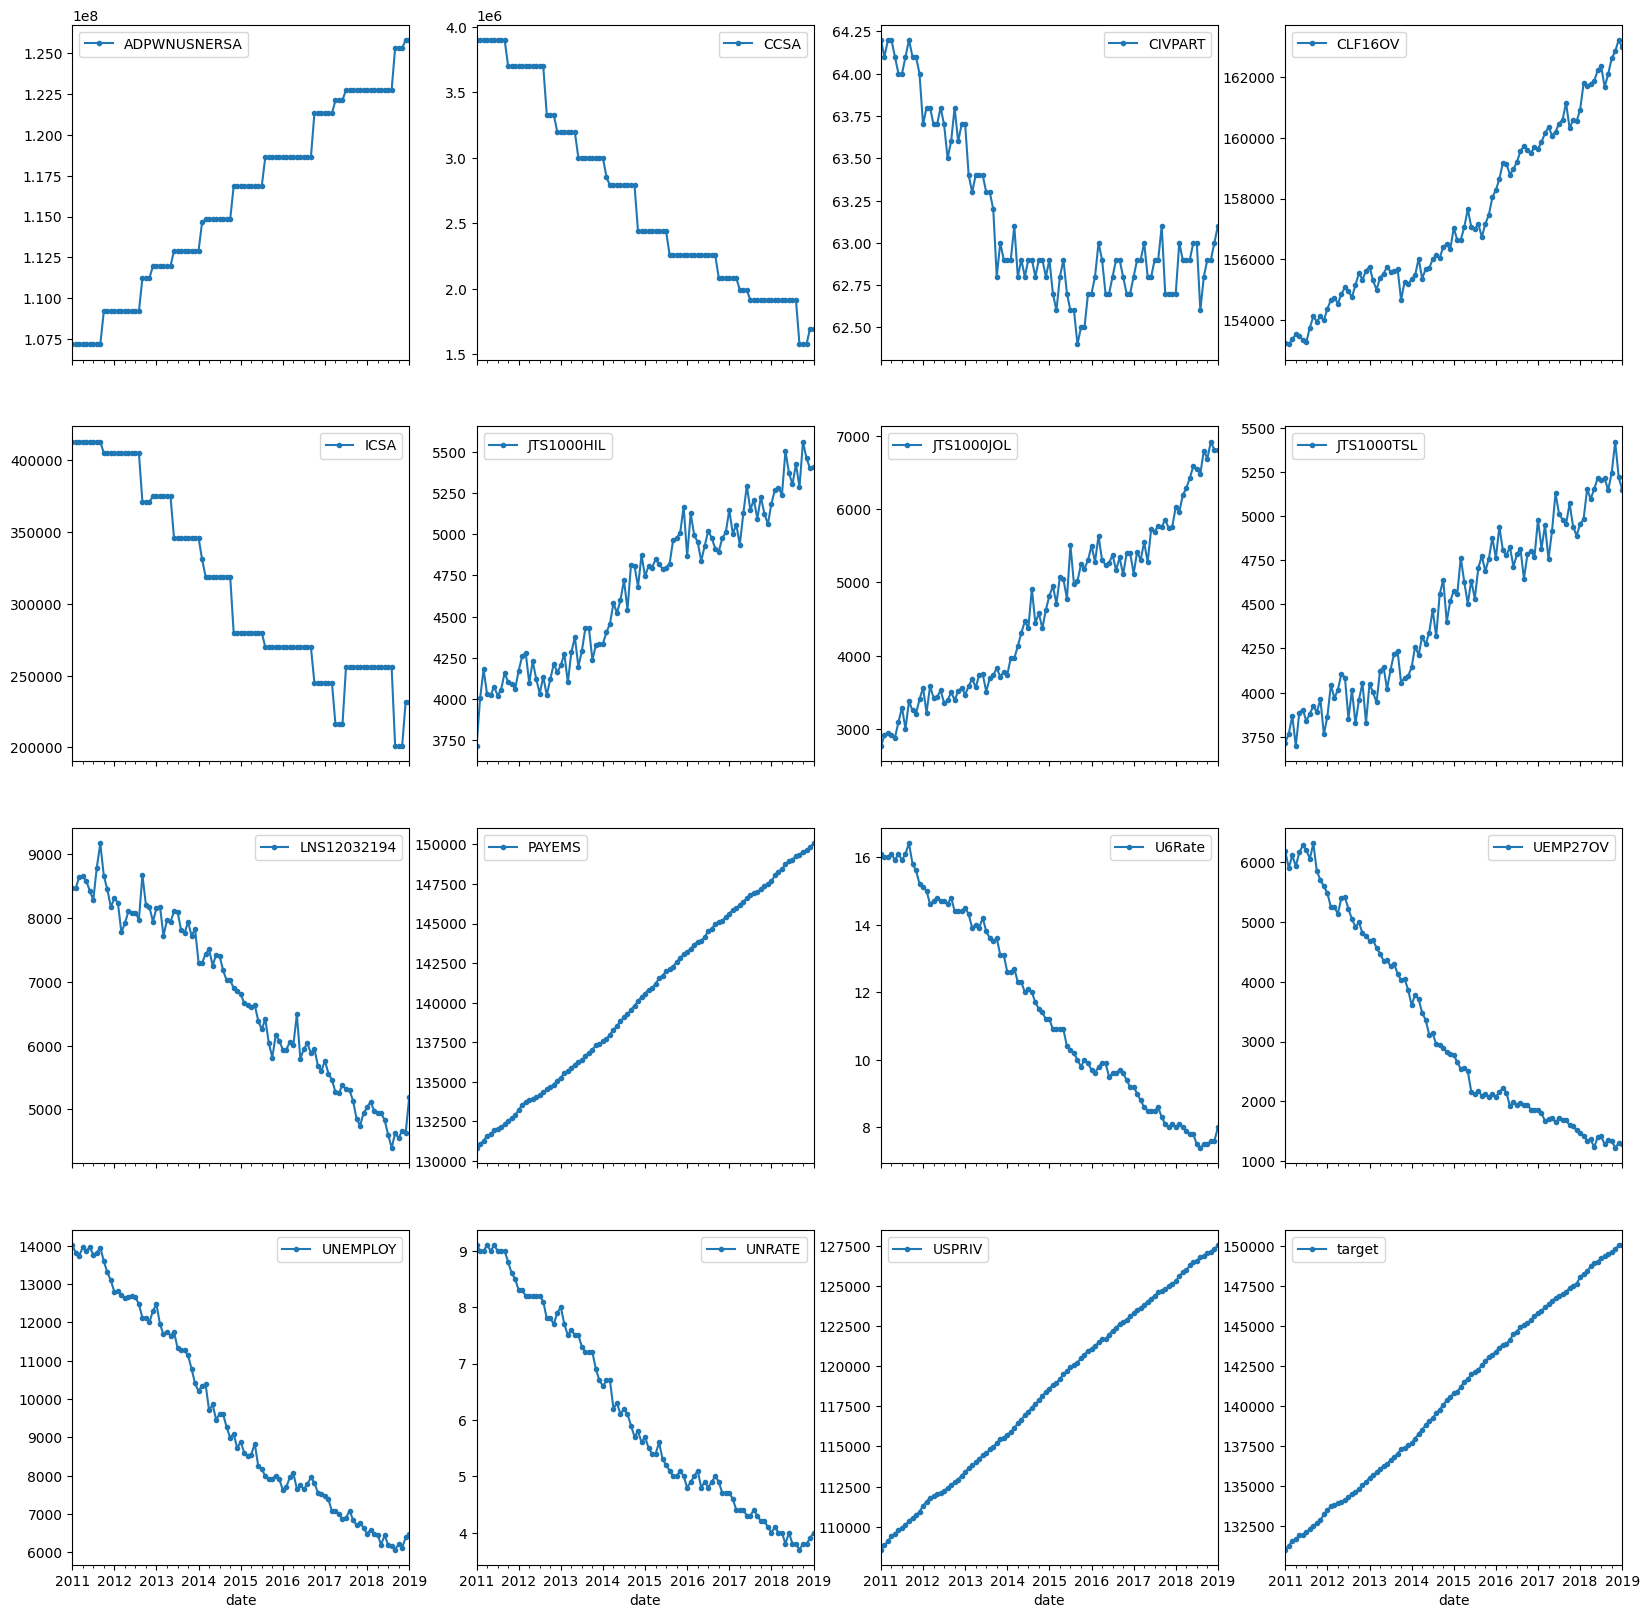

In [9]:
fig, axs = plt.subplots(nrows=plot_rows, ncols=plot_cols, sharex=True, figsize=[20, 20])
i = 0
for r in range(0, plot_rows):
    for c in range(0,plot_cols):
        ax = axs[r, c]
        if i < len(widedf.columns):
            widedf.plot(ax=ax, y=widedf.columns[i], marker='.')
            i += 1

In [ ]:
diffdf.tail()

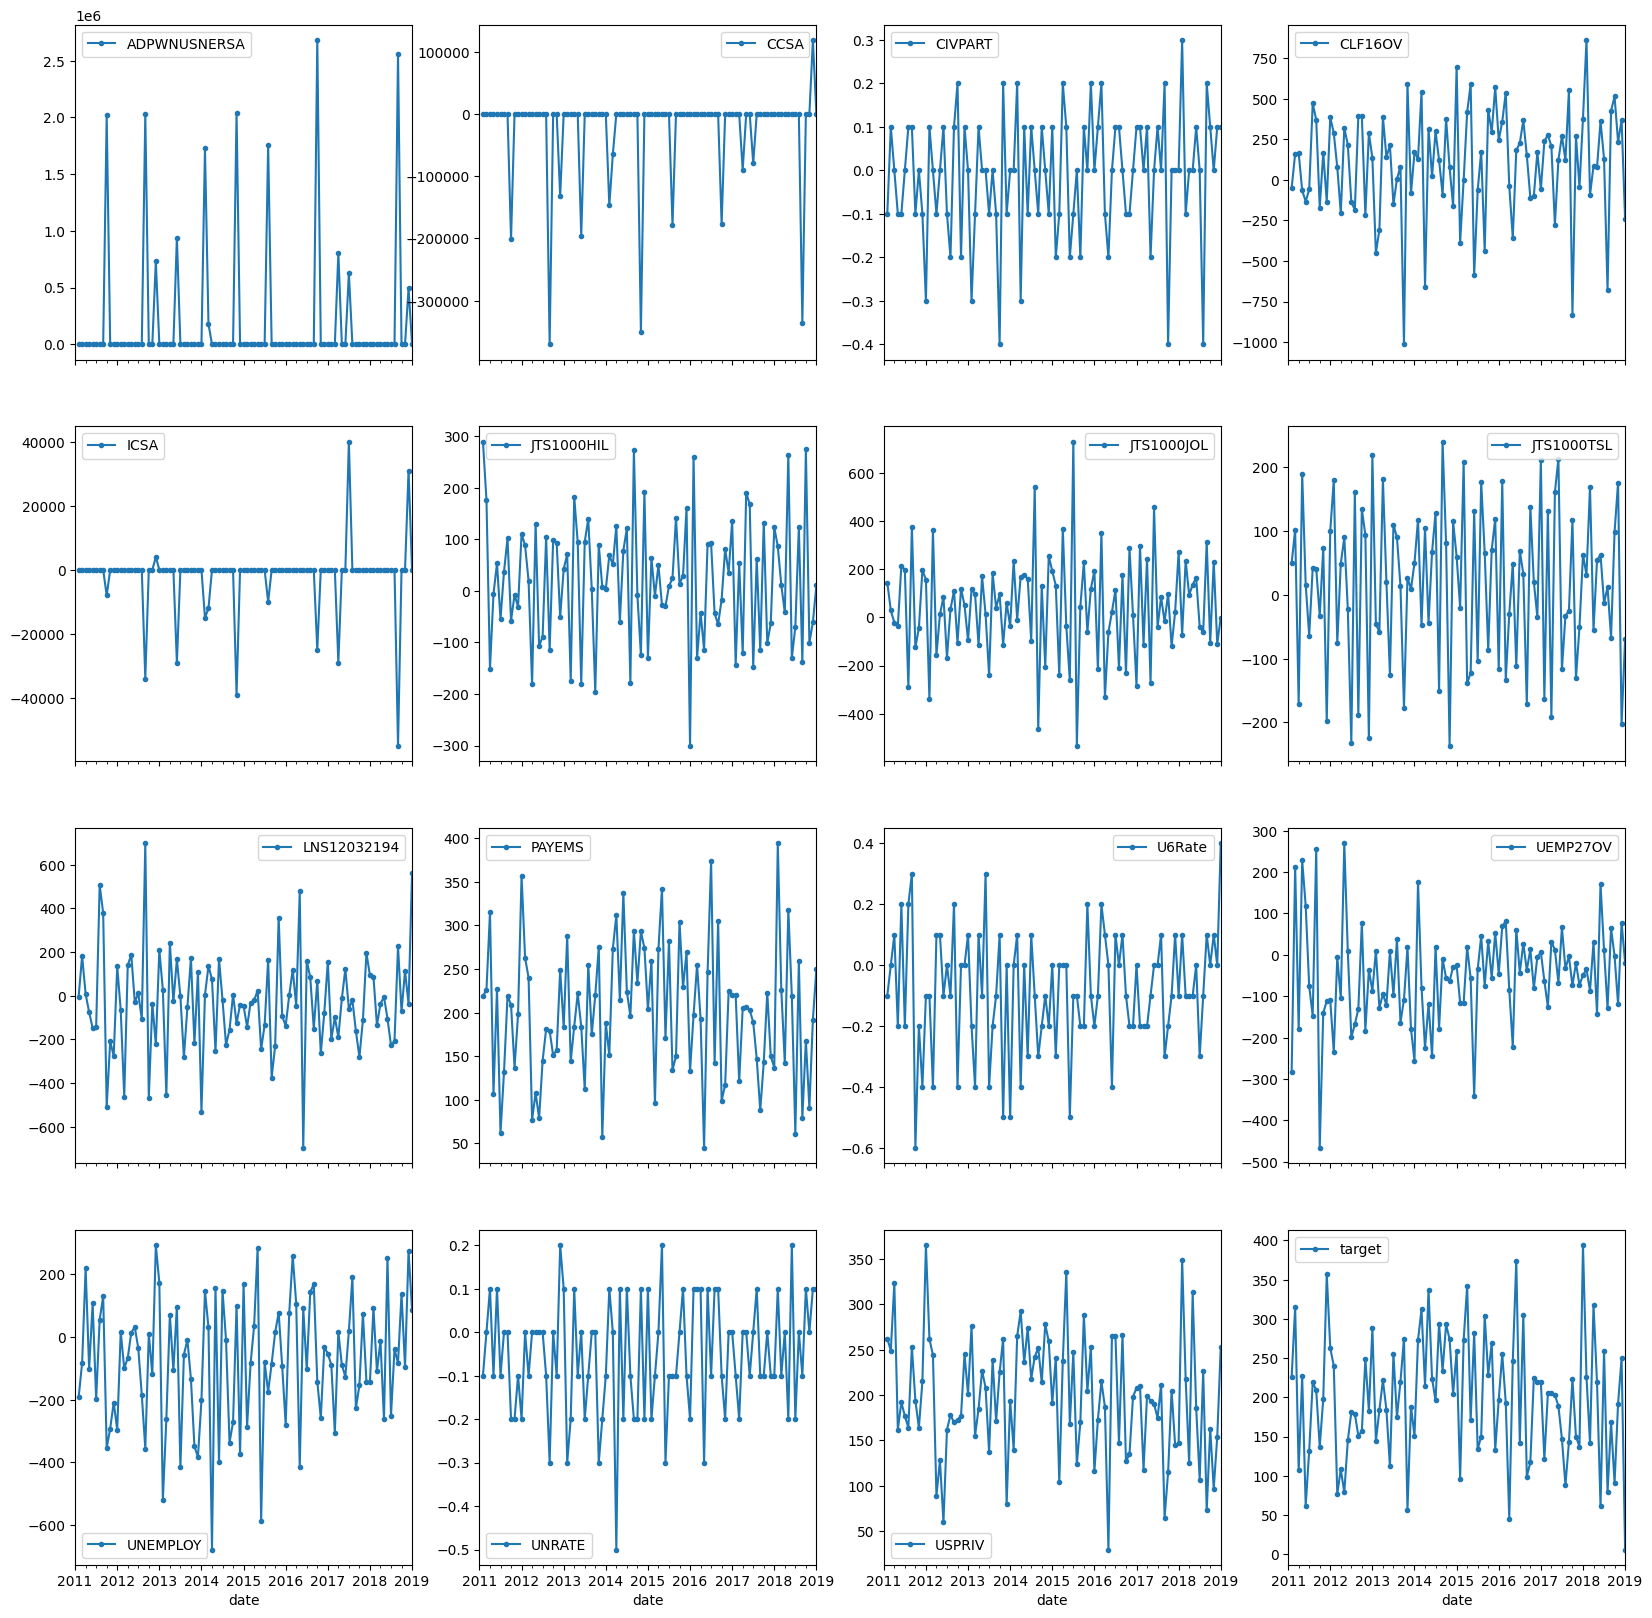

In [149]:
fig, axs = plt.subplots(nrows=plot_rows, ncols=plot_cols, sharex=True, figsize=[20, 20])
i = 0
for r in range(0, plot_rows):
    for c in range(0,plot_cols):
        ax = axs[r, c]
        if i < len(y.columns):
            diffdf.plot(ax=ax, y=diffdf.columns[i], marker='.')
            i += 1

In [26]:
xcols = ['PAYEMS', 'UNRATE', 'CLF16OV']
ycol = 'target'
allvars = xcols + [ycol]
allvars

['PAYEMS', 'UNRATE', 'CLF16OV', 'target']

In [27]:
regrdf = diffdf[allvars]
regrdf.tail()

series_id,PAYEMS,UNRATE,CLF16OV,target
date,,,,
2018-09-01,79.0,-0.1,427.0,168.0
2018-10-01,168.0,0.1,515.0,91.0
2018-11-01,91.0,0.0,234.0,192.0
2018-12-01,192.0,0.1,370.0,250.0
2019-01-01,250.0,0.1,-243.0,6.0


In [28]:
plot_cols = 2
plot_rows = int(np.ceil(len(regrdf.columns) / plot_cols))
plot_rows

2

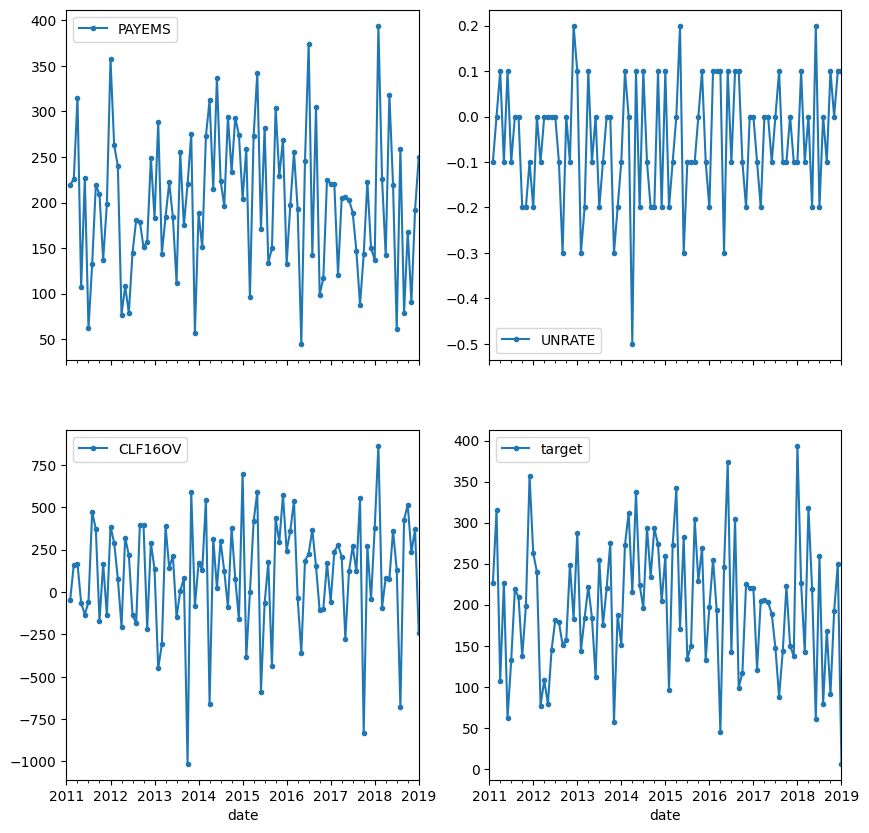

In [29]:
fig, axs = plt.subplots(nrows=plot_rows, ncols=plot_cols, sharex=True, figsize=[10, 10])
i = 0
for r in range(0, plot_rows):
    for c in range(0,plot_cols):
        ax = axs[r, c]
        if i < len(regrdf.columns):
            regrdf.plot(ax=ax, y=regrdf.columns[i], marker='.')
            i += 1

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd # For data handling

In [95]:
df = regrdf
X = df[xcols]
y = df[ycol]
# train before 2016
# val = 2016
# test 2017
X_train = X.loc[(X.index > '2011-01-01') & (X.index < '2017-01-01')]
y_train = y.loc[(y.index > '2011-01-01') & (y.index < '2017-01-01')]

X_val = X.loc[(X.index < '2018-01-01') & (X.index >= '2017-01-01')]
y_val = y.loc[(y.index < '2018-01-01') & (y.index >= '2017-01-01')]

X_test = X.loc[X.index >= '2018-01-01']
y_test = y.loc[y.index >= '2018-01-01']


In [98]:
y_train
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

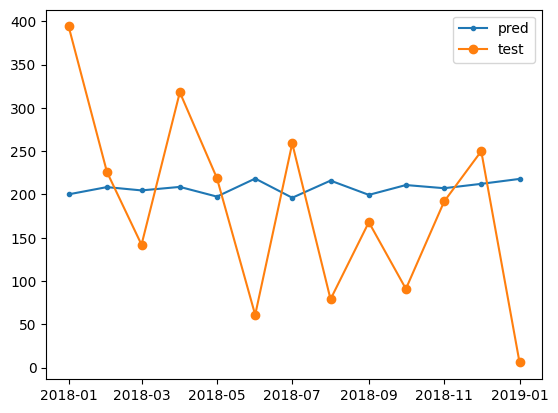

In [99]:
ypred = pd.DataFrame(data=pred, index=y_test.index)
#lot(x=y_pred.index, y=y_pred.values)
plt.plot(ypred, label="pred", marker='.')
plt.plot(y_test, label="test", marker='o')
plt.legend()
plt.show()

In [83]:
# Initialize the Random Forest Regressor
# n_estimators: number of trees in the forest
# random_state: for reproducibility
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
y_test.shape

(25, 4)

In [72]:
type(rf_regressor)
rf_regressor

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
pred = rf_regressor.predict(X_test)

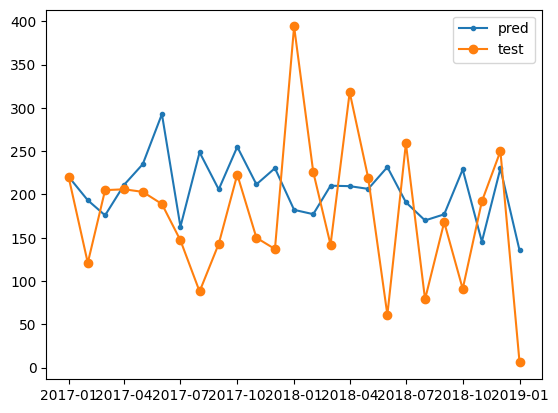

In [94]:
ypred = pd.DataFrame(data=pred, index=y_test.index)
#lot(x=y_pred.index, y=y_pred.values)
plt.plot(ypred, label="pred", marker='.')
plt.plot(y_test, label="test", marker='o')
plt.legend()
plt.show()

In [78]:
X_test.shape

(25, 3)